In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
data_file_path = "saved/layer1.npz"
data = np.load(data_file_path)

w_pp_bu = data["w_pp_bu"]
w_pp_td = data["w_pp_td"]
w_ip    = data["w_ip"] # (10,20)
w_pi    = data["w_pi"] # (20,10)

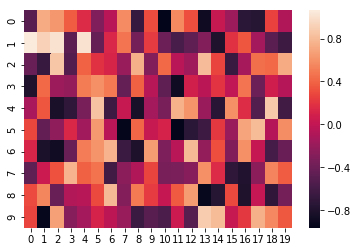

In [16]:
sns.heatmap(w_ip)

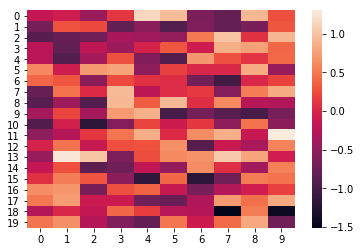

In [17]:
sns.heatmap(w_pi)

In [13]:
data_file_path = "saved/layer0.npz"
data = np.load(data_file_path)
w_pp_bu = data["w_pp_bu"]
w_pp_td = data["w_pp_td"]

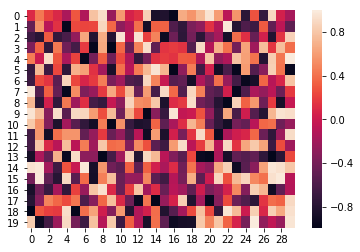

In [14]:
sns.heatmap(w_pp_bu)

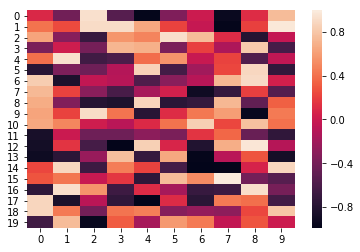

In [18]:
sns.heatmap(w_pp_td)

In [19]:
from model import Layer, LAYER_TYPE_BOTTOM, LAYER_TYPE_HIDDEN, LAYER_TYPE_TOP, LowPassFilter
class Network(object):
    def __init__(self):
        self.layer0 = Layer(pd_unit_size=30, layer_type=LAYER_TYPE_BOTTOM)
        self.layer1 = Layer(pd_unit_size=20, layer_type=LAYER_TYPE_HIDDEN)
        self.layer2 = Layer(pd_unit_size=10, layer_type=LAYER_TYPE_TOP)
        
        self.layer0.connect_to(self.layer1)
        self.layer1.connect_to(self.layer2)

    def update(self, dt):
        self.layer0.update_potential(dt)
        self.layer1.update_potential(dt)
        self.layer2.update_potential(dt)
        
        self.layer0.update_weight(dt)
        self.layer1.update_weight(dt)
        self.layer2.update_weight(dt)

    def set_sensor_input(self, values):
        self.layer0.set_sensor_input(values)

In [31]:
np.random.seed(seed=0)
network = Network()

dt = 0.1
lp_filter = LowPassFilter(dt, 3)

v_p_as = []
v_p_bs = []
v_i_bs = []
u_ps = []
u_is = []
inputs_0 = []
    
for i in range(100):
    # 100ms = 1000 step間値を固定する.
    values = np.random.rand(30)
    for j in range(1000):
        filtered_values = lp_filter.process(values)
        network.set_sensor_input(filtered_values)
        network.update(dt)

        inputs_0.append(filtered_values[0])
        v_p_a = np.mean(network.layer1.v_p_a)
        v_p_as.append(v_p_a)
        v_p_bs.append(network.layer1.v_p_b[0])
        v_i_bs.append(network.layer1.v_i_b[0])
        u_ps.append(network.layer1.u_p[0])
        u_is.append(network.layer1.u_i[0])                

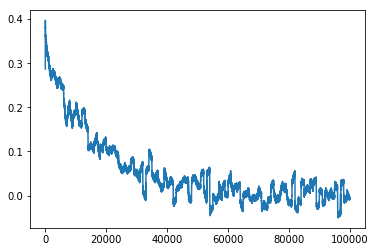

In [21]:
plt.plot(v_p_as)

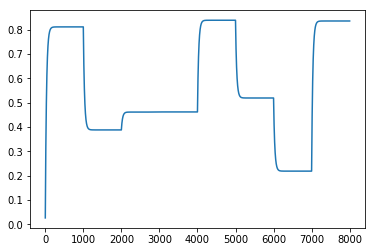

In [27]:
plt.plot(inputs_0[:8000])

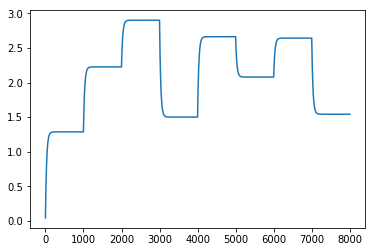

In [30]:
plt.plot(v_p_bs[:8000])

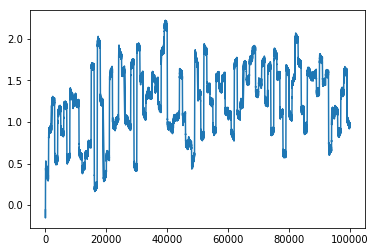

In [33]:
plt.plot(u_ps)

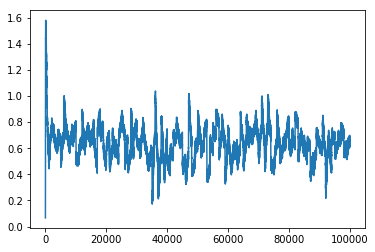

In [34]:
plt.plot(u_is)